In [1]:
import pandas as pd
import torch
from torch_geometric.data import Data
import numpy as np

d:\Programs\miniconda\envs\sma\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_raw = pd.read_csv("voz_complete_data.csv").sample(10,random_state =1).reset_index(drop=True)
data_raw.head() 

,User,Reply_To,Original_Comment,Reply_Content,Title,OriginalUser
0,Dragunity,NaN,NaN,"lũ lò gốm súc vật thật sự , 007 đi bú card",Cảnh nóng gây sốc của Daniel Craig,echeveria
1,d3K.Or,Atrieu_fog_do_da_chở_lai,Xứ rãy chết nhiều bệnh lạ nhỉ.sống ở vn khỏe r...,"Xứ này khi xưa mà mang gen dị ứng vừng lạc, cà...",[Mỹ]Nữ sinh tử vong sau khi ăn món yêu thích ở...,Phanh Blank 2
2,dangtungduy,helpmenow,"Tiktok có mấy bài suốt ngày ""từ nơi đồng xanh....",Chả hiểu đội đỏ hay đội vàng làm mà nó một màu...,Chấn chỉnh tình trạng âm nhạc thiếu chất lượng...,Thời sự việc
3,thanquyenno9,NaN,NaN,"Vl nhỉ. Ở tây trc khi khách ăn , phục vụ phải ...",[Mỹ]Nữ sinh tử vong sau khi ăn món yêu thích ở...,Phanh Blank 2
4,JacksonT,cdragonxtreme clone,Giờ muốn bán thời trang nuôi 1 đội làm video l...,"T thấy shop đứa bạn ko live gì mấy, cũng có nh...",Cuộc chiến sinh tồn của nhà sản xuất Việt Nam,demon0989


In [4]:
from sentence_transformers import SentenceTransformer
import networkx as nx

model = SentenceTransformer("sentence-transformers/paraphrase-MiniLM-L6-v2")


G = nx.Graph()

for i in range(data_raw.shape[0]):
    user_node = data_raw["User"][i]
    content_node = data_raw["Content"][i]
    title_node = data_raw["Title"][i]
    original_user_node = data_raw["OriginalUser"][i]
    
    title_embedding = model.encode(str(title_node))
    content_embedding = model.encode(str(content_node))
    
    if user_node in G:
        old_embedding = G.nodes[user_node].get("embedding", np.zeros_like(content_embedding))
        updated_embedding = old_embedding + content_embedding  # Cộng vector
        G.nodes[user_node]["embedding"] = updated_embedding
    else:
        G.add_node(user_node,type="user", embedding=content_embedding)
    if title_node in G:
        old_embedding = G.nodes[title_node].get("embedding", np.zeros_like(title_embedding))
        updated_embedding = old_embedding + title_embedding  
        G.nodes[title_node]["embedding"] = updated_embedding
    else:
        G.add_node(title_node,type="topic", embedding=title_embedding)
    
    G.add_edge(title_node,user_node,relationship="comment_about")
    if user_node!=original_user_node:
        G.add_edge(user_node, original_user_node, relationship="comment_to")


d:\Programs\miniconda\envs\sma\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ching\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


KeyError: 'Content'

In [2]:
from neo4j import GraphDatabase

uri = "neo4j+s://59e7e805.databases.neo4j.io"
username = "neo4j"
password = "McjHjGemQOsH_G3TgSkP4op6tt2ImJDhoaWxjTmqPJQ"
driver = GraphDatabase.driver(uri, auth=(username, password))

In [5]:
for node, attrs in G.nodes(data=True):
    print(attrs)

{'type': 'user', 'embedding': array([ 0.07417256,  0.49862438, -0.13486844, -0.40378684, -0.13314548,
        0.1707962 ,  0.31983173,  0.05199028,  0.19663887,  0.12520698,
        0.58375555, -0.32708   , -0.05752239, -0.02936376,  0.14104469,
       -0.1521339 ,  0.09991437,  0.23383723, -0.14153661, -0.36825344,
        0.01100884, -0.23882496,  0.03318159, -0.26491156, -0.4269889 ,
        0.02106331,  0.2518556 ,  0.334228  ,  0.38925734, -0.0823239 ,
        0.19820972,  0.5258959 , -0.11322625,  0.18773715, -0.04651151,
       -0.1060093 , -0.36503395, -0.13386886, -0.11268502, -0.25402433,
       -0.00953474,  0.11561528, -0.03758866,  0.01043851,  0.14094716,
       -0.12837648,  0.08505084, -0.2276987 , -0.06217378, -0.21328805,
        0.09046648,  0.2680895 , -0.03073949, -0.14724833,  0.02297127,
       -0.11718357,  0.01971842,  0.7382624 ,  0.23302881, -0.10567112,
        0.05751837,  0.28117776, -0.396302  ,  0.0752876 , -0.00455411,
       -0.21027291,  0.0107411 , -

In [ ]:
from neo4j import GraphDatabase
uri = "bolt://localhost:7687"
username = "neo4j"
password = "12345678"
driver = GraphDatabase.driver(uri, auth=(username, password))

In [23]:
def transfer_networkx_to_neo4j(driver, G):
    with driver.session() as session:
        for node, attrs in G.nodes(data=True):
            type_node = attrs.get('type', 'Default') 
            embedding = attrs.get('embedding', None) 
            query = f"""
            MERGE (n:{type_node} {{Content: $node_id}})
            SET n.embbding = $emb
            """
            session.run(query, node_id=node, emb=embedding)
        for u, v, attrs in G.edges(data=True):
            relationship = attrs.get("relationship", "RELATED") 
            query = f"""
                MATCH (n1 {{Content: $content1}}), (n2 {{Content: $content2}})
                MERGE (n1)-[r:{relationship}]->(n2)
                SET r += $attributes
            """
            # Thực thi truy vấn
            session.run(query, content1=u, content2=v, attributes=attrs)



In [24]:
transfer_networkx_to_neo4j(driver, G)
driver.close()


In [43]:
query = """
    MATCH (n:user)-[r]->(m:user)
    RETURN n, r, m
    """
with driver.session() as session:
    ata = session.run(query)

In [41]:
ata.graph()

ResultConsumedError: The result has been consumed. Fetch all needed records before calling Result.consume().

In [34]:
import networkx as nx

# Tạo đồ thị có hướng
user_graph = nx.DiGraph()

with driver.session() as session:
    data = session.execute_read(fetch_user_graph)

# Thêm nút và cạnh từ dữ liệu truy vấn
for record in data:
    n = record['n']  # Nút nguồn
    m = record['m']  # Nút đích
    r = record['r']  # Quan hệ

    # Thêm nút với các thuộc tính
    user_graph.add_node(n.id, **n._properties)
    user_graph.add_node(m.id, **m._properties)
    
    # Thêm cạnh với các thuộc tính
    user_graph.add_edge(n.id, m.id, **r._properties)


Number of nodes: 0
Number of edges: 0


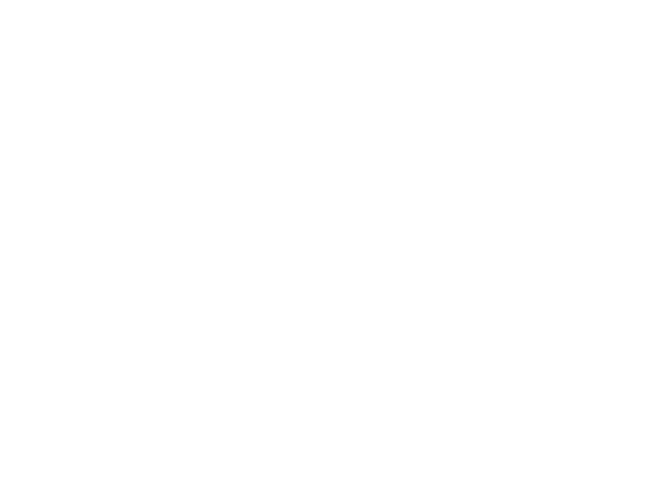

In [35]:
# In số lượng nút và cạnh
print(f"Number of nodes: {user_graph.number_of_nodes()}")
print(f"Number of edges: {user_graph.number_of_edges()}")

# In thông tin các nút
for node, attrs in user_graph.nodes(data=True):
    print(f"Node {node}: {attrs}")

# Trực quan hóa (tùy chọn)
import matplotlib.pyplot as plt
nx.draw(user_graph, with_labels=True, node_size=500, node_color="lightblue")
plt.show()


In [ ]:
from networkx.algorithms.community import girvan_newman
communities_generator = girvan_newman(G)

top_level_communities = next(communities_generator)

top_level_communities = [list(community) for community in top_level_communities]

for i, community in enumerate(top_level_communities):
    print(f"Community {i + 1}: {community}")

Community 1: ['sonjk', 'Ahamove', 'Yolo22_3', 'pikachippy', 'cụ chánh tổng', 'stonecold166.02', 'Jaguar I-Type 6', 'cmajor', 'mannco52', 'mystery07', 'aelous', 'baotrungnazi6', 'Tintin2511', 'Johny Ouro', 'tombery8', 'thancongdotdit', 'deathknight13', 'Delta male', 'cruelpham', '21041995', 'Ngoi Nhin', 'f0ng', 'doku2', 'thuyvan', 'Crow', 'MVSD-432', 'mouse123479', 'man_in_black', 'Gixxer', 'Vtm1010', 'mounaambaak', 'Thích Car Money', 'toxic_guy', 'Imissyoursmile', 'sukiyaki', 'Anh Ba Ngọc Sơn', 'darkrose1', 'Balinow', 'Apolo_kia', 'Ưng឴឴឴', 'Wibu Heavy Industries', 'ThuanKun', 'tung_63', 'tengtengvn', 'Gay_Lord', 'banchai_kemdanhrang', 'tromsod', 'Anicetus', 'remyrevy', 'daidam07.', 'James Morgan McGil', 'Hạnh Còi', 'resooser', 'Phanh Blank 4', 'AnhSeVe', 'kazac']
Community 2: ['Bay Màu']


In [4]:
from torch_geometric.utils import from_networkx
data = from_networkx(G)

data.x = torch.tensor([G.nodes[n]["embedding"] for n in G.nodes()], dtype=torch.float)


c:\Users\ADMIN\anaconda3\envs\stats\lib\site-packages\torch_geometric\utils\convert.py:278: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:264.)
  data_dict[key] = torch.as_tensor(value)


In [5]:
import torch
from torch_geometric.nn import GCNConv
import torch.optim as optim


# Định nghĩa GCN Model
class GCNCommunityDetection(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNCommunityDetection, self).__init__()
        self.conv1 = GCNConv(in_channels, 32)
        self.conv2 = GCNConv(32, out_channels)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

model = GCNCommunityDetection(in_channels= data.x.size(1), out_channels=3)  # 2 cộng đồng
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = torch.nn.functional.mse_loss(out, torch.ones_like(out))  # Loss đơn giản
    loss.backward()
    optimizer.step()
    return loss.item()

# Huấn luyện trong 100 epoch
for epoch in range(100):
    loss = train()
    print(f'Epoch {epoch+1}, Loss: {loss}')

# Lấy kết quả embedding cho mỗi node
model.eval()
embeddings = model(data).detach().numpy()


Epoch 1, Loss: 1.6279823780059814
Epoch 2, Loss: 48.318519592285156
Epoch 3, Loss: 4.987172603607178
Epoch 4, Loss: 0.8461993336677551
Epoch 5, Loss: 0.8764184713363647
Epoch 6, Loss: 0.8837628960609436
Epoch 7, Loss: 0.6769768595695496
Epoch 8, Loss: 0.5339933037757874
Epoch 9, Loss: 0.5254859924316406
Epoch 10, Loss: 0.6064308285713196
Epoch 11, Loss: 0.6905426383018494
Epoch 12, Loss: 0.7175906896591187
Epoch 13, Loss: 0.6789624094963074
Epoch 14, Loss: 0.6024755239486694
Epoch 15, Loss: 0.5260751247406006
Epoch 16, Loss: 0.4781475067138672
Epoch 17, Loss: 0.46720588207244873
Epoch 18, Loss: 0.48085397481918335
Epoch 19, Loss: 0.4948744773864746
Epoch 20, Loss: 0.48882174491882324
Epoch 21, Loss: 0.457611083984375
Epoch 22, Loss: 0.4112643301486969
Epoch 23, Loss: 0.3656408190727234
Epoch 24, Loss: 0.33248651027679443
Epoch 25, Loss: 0.31455767154693604
Epoch 26, Loss: 0.3066953122615814
Epoch 27, Loss: 0.30046167969703674
Epoch 28, Loss: 0.28910592198371887
Epoch 29, Loss: 0.270546

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
import torch
from torch_geometric.nn import Node2Vec
node2vec = Node2Vec(
    edge_index=data.edge_index,
    embedding_dim=20,
    walk_length=20,  # Độ dài mỗi random walk
    context_size=5,  # Kích thước ngữ cảnh
    walks_per_node=10,  # Số lần random walk trên mỗi node
    p=1,  # Tham số điều chỉnh độ sâu của DFS
    q=1,  # Tham số điều chỉnh độ sâu của BFS
    num_negative_samples=1,
    sparse=True,
).to(device)
loader = node2vec.loader(batch_size=128, shuffle=True)
optimizer = torch.optim.SparseAdam(list(node2vec.parameters()), lr=0.01)

In [10]:
def train():
    node2vec.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = node2vec.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')


Epoch: 001, Loss: 4.0026
Epoch: 002, Loss: 4.0107
Epoch: 003, Loss: 3.7712
Epoch: 004, Loss: 3.8131
Epoch: 005, Loss: 3.7225
Epoch: 006, Loss: 3.6741
Epoch: 007, Loss: 3.6085
Epoch: 008, Loss: 3.5392
Epoch: 009, Loss: 3.4607
Epoch: 010, Loss: 3.3877
Epoch: 011, Loss: 3.4070
Epoch: 012, Loss: 3.3005
Epoch: 013, Loss: 3.2141
Epoch: 014, Loss: 3.1592
Epoch: 015, Loss: 3.1015
Epoch: 016, Loss: 3.0359
Epoch: 017, Loss: 3.0065
Epoch: 018, Loss: 2.9367
Epoch: 019, Loss: 2.8936
Epoch: 020, Loss: 2.8969
Epoch: 021, Loss: 2.7940
Epoch: 022, Loss: 2.7447
Epoch: 023, Loss: 2.7676
Epoch: 024, Loss: 2.6711
Epoch: 025, Loss: 2.6434
Epoch: 026, Loss: 2.6196
Epoch: 027, Loss: 2.5702
Epoch: 028, Loss: 2.5016
Epoch: 029, Loss: 2.4578
Epoch: 030, Loss: 2.4429
Epoch: 031, Loss: 2.4213
Epoch: 032, Loss: 2.3907
Epoch: 033, Loss: 2.3835
Epoch: 034, Loss: 2.3435
Epoch: 035, Loss: 2.3136
Epoch: 036, Loss: 2.2555
Epoch: 037, Loss: 2.2398
Epoch: 038, Loss: 2.2438
Epoch: 039, Loss: 2.2050
Epoch: 040, Loss: 2.1578


In [11]:
embeddings = node2vec().detach().cpu().numpy()

In [12]:
from sklearn.cluster import KMeans

# Phân cụm các node embedding bằng KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)

# In kết quả phân cụm
for i, cluster in enumerate(clusters):
    print(f"Node {list(G.nodes) [i]} thuộc về cụm {cluster}")


Node thuyvan thuộc về cụm 1
Node Bay Màu thuộc về cụm 1
Node Delta male thuộc về cụm 1
Node Phanh Blank 4 thuộc về cụm 1
Node Johny Ouro thuộc về cụm 1
Node Anh Ba Ngọc Sơn thuộc về cụm 1
Node aelous thuộc về cụm 2
Node mannco52 thuộc về cụm 1
Node daidam07. thuộc về cụm 2
Node stonecold166.02 thuộc về cụm 1
Node Gay_Lord thuộc về cụm 1
Node cruelpham thuộc về cụm 1
Node Vtm1010 thuộc về cụm 2
Node Ahamove thuộc về cụm 1
Node tung_63 thuộc về cụm 1
Node Jaguar I-Type 6 thuộc về cụm 1
Node resooser thuộc về cụm 1
Node Imissyoursmile thuộc về cụm 1
Node pikachippy thuộc về cụm 1
Node banchai_kemdanhrang thuộc về cụm 1
Node f0ng thuộc về cụm 1
Node toxic_guy thuộc về cụm 1
Node Yolo22_3 thuộc về cụm 1
Node darkrose1 thuộc về cụm 1
Node AnhSeVe thuộc về cụm 2
Node remyrevy thuộc về cụm 2
Node Crow thuộc về cụm 2
Node Anicetus thuộc về cụm 1
Node cụ chánh tổng thuộc về cụm 0
Node man_in_black thuộc về cụm 1
Node sonjk thuộc về cụm 1
Node Balinow thuộc về cụm 1
Node 21041995 thuộc về cụm 1
N

c:\Users\ADMIN\anaconda3\envs\stats\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


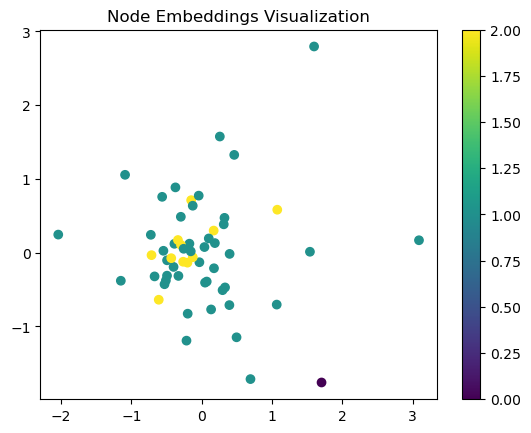

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
reduced_embeddings = pca.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis')
plt.colorbar()
plt.title("Node Embeddings Visualization")
plt.show()


In [17]:
G2 = G.copy()

In [ ]:
embedding_values = [] 